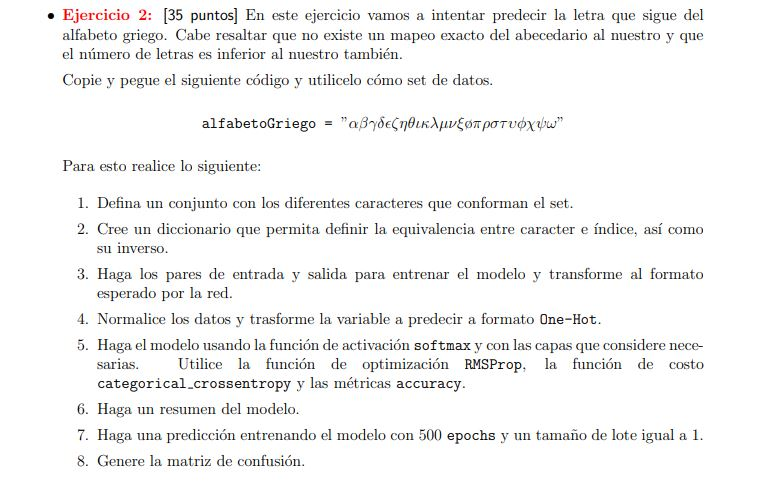

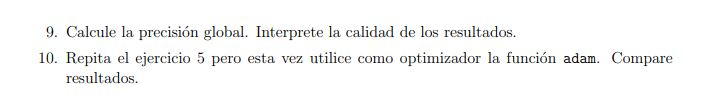

#### Importación de librerías

In [1]:
import os
import re
import os
import cv2
import warnings
import seaborn as sn
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from matplotlib import colors as mcolors
from modulos.predictPy_deep_learning import Analisis_Predictivo
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report  

warnings.filterwarnings('ignore')

#### 2.1 Carga de datos

In [2]:
alfabeto = "αβγδεζηθικλµνξøπρστυφχψω" 

#### 2.2 Creamos diccionario

In [3]:
char_to_int = dict((c, i) for i, c in enumerate(alfabeto))
int_to_char = dict((i, c) for i, c in enumerate(alfabeto))

print("char_to_int:\n", char_to_int, "\n")

char_to_int:
 {'α': 0, 'β': 1, 'γ': 2, 'δ': 3, 'ε': 4, 'ζ': 5, 'η': 6, 'θ': 7, 'ι': 8, 'κ': 9, 'λ': 10, 'µ': 11, 'ν': 12, 'ξ': 13, 'ø': 14, 'π': 15, 'ρ': 16, 'σ': 17, 'τ': 18, 'υ': 19, 'φ': 20, 'χ': 21, 'ψ': 22, 'ω': 23} 



#### 2.3 Creamos los datos de entrada

In [10]:
# creamos nuestros pares de entrada y salida para entrenar nuestra red neuronal
seq_length = 1
dataX = []
dataY = []

for i in range(0, len(alfabeto) - seq_length):
    
    seq_in = alfabeto[i:i + seq_length]
    seq_out = alfabeto[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    print(seq_in, '->', seq_out)

α -> β
β -> γ
γ -> δ
δ -> ε
ε -> ζ
ζ -> η
η -> θ
θ -> ι
ι -> κ
κ -> λ
λ -> µ
µ -> ν
ν -> ξ
ξ -> ø
ø -> π
π -> ρ
ρ -> σ
σ -> τ
τ -> υ
υ -> φ
φ -> χ
χ -> ψ
ψ -> ω


In [11]:
X = np.reshape(dataX, (len(dataX), seq_length, 1))
print("Shape: ", X.shape)

Shape:  (23, 1, 1)


In [12]:
print(X)

[[[ 0]]

 [[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]

 [[21]]

 [[22]]]


#### 2.4 Creamos los datos de entrada

In [13]:
X = X / float(len(alfabeto))
X

array([[[0.        ]],

       [[0.04166667]],

       [[0.08333333]],

       [[0.125     ]],

       [[0.16666667]],

       [[0.20833333]],

       [[0.25      ]],

       [[0.29166667]],

       [[0.33333333]],

       [[0.375     ]],

       [[0.41666667]],

       [[0.45833333]],

       [[0.5       ]],

       [[0.54166667]],

       [[0.58333333]],

       [[0.625     ]],

       [[0.66666667]],

       [[0.70833333]],

       [[0.75      ]],

       [[0.79166667]],

       [[0.83333333]],

       [[0.875     ]],

       [[0.91666667]]])

In [14]:
y = to_categorical(dataY)
print(y[0:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 2.5 Definimos el modelo a usar

In [16]:
modelo = Sequential()
modelo.add(LSTM(64, input_shape = (X.shape[1], X.shape[2])))
modelo.add(Dense(32, activation="softmax"))
modelo.add(Dense(y.shape[1], activation = 'softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

#### 2.6 Resumen del modelo

In [17]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
Total params: 19,768
Trainable params: 19,768
Non-trainable params: 0
_________________________________________________________________


#### 2.7 Entrenamiento del modelo

In [20]:
# Se ajusta con 500 epochs con un tamaño de lote de 1.
modelo.fit(X, y, epochs=500, batch_size=1, verbose=0)

#### 2.8 Matriz de confusión

In [21]:
modelo_pred = modelo.predict(X,verbose=0)
rnn_modelo_predicted = np.argmax(modelo_pred, axis=1)
rnn_modelo_predicted

array([ 1,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       17, 19, 20, 23, 23, 23], dtype=int64)

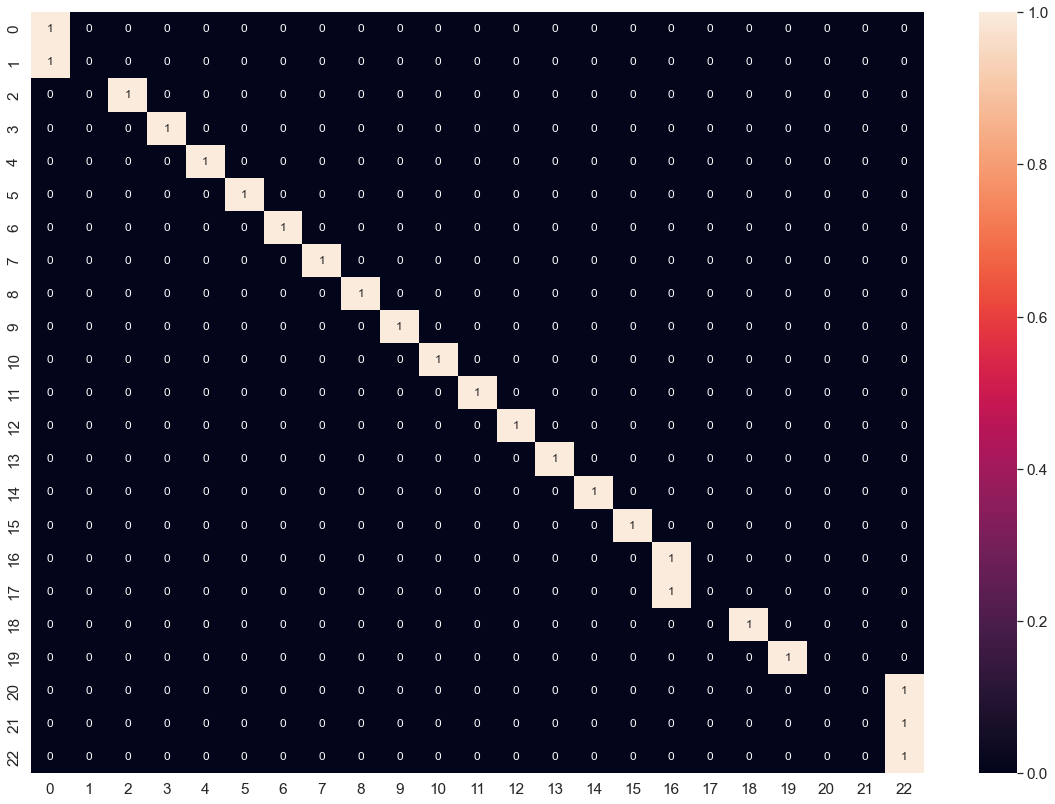

In [23]:
rnn_modelo_cm = confusion_matrix(np.argmax(y, axis=1), rnn_modelo_predicted)

# Visualiamos la matriz de confusión
rnn_modelo_df_cm = pd.DataFrame(rnn_modelo_cm, range(23), range(23))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(rnn_modelo_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

In [24]:
# demuestra la predicciones del modelo
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alfabeto))
    prediction = modelo.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

['α'] -> β
['β'] -> β
['γ'] -> δ
['δ'] -> ε
['ε'] -> ζ
['ζ'] -> η
['η'] -> θ
['θ'] -> ι
['ι'] -> κ
['κ'] -> λ
['λ'] -> µ
['µ'] -> ν
['ν'] -> ξ
['ξ'] -> ø
['ø'] -> π
['π'] -> ρ
['ρ'] -> σ
['σ'] -> σ
['τ'] -> υ
['υ'] -> φ
['φ'] -> ω
['χ'] -> ω
['ψ'] -> ω


#### 2.9 Precisión global

In [25]:
scores = modelo.evaluate(X, y, verbose = 0)
print("Precisión del modelo: %.2f%%" % (scores[1]*100))

Precisión del modelo: 82.61%


In [27]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria = pd.DataFrame(MC.diagonal() / np.sum(MC, axis = 1)).T
    if nombres != None:
        precision_categoria.columns = nombres
  
    return {
    "Matriz de Confusión" : MC,
    "Precisión Global" : precision_global,
    "Error Global" : error_global,
    "Precisión por categoría" : precision_categoria}

In [40]:
seq_length=1
labels=[]
for i in range(0, len(alfabeto) - seq_length):
    
    seq_in = alfabeto[i:i + seq_length]
    labels.append(seq_in)

MC =confusion_matrix(np.argmax(y, axis=1), rnn_modelo_predicted)
indices = indices_general(MC, list(labels))
for k in indices:
      print("\n%s:\n%s" % (k, str(indices[k])))


Matriz de Confusión:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

#### 2.10 Cambio de parámetros

In [41]:
modelo2 = Sequential()
modelo2.add(LSTM(64, input_shape = (X.shape[1], X.shape[2])))
modelo2.add(Dense(32, activation="softmax"))
modelo2.add(Dense(y.shape[1], activation = 'softmax'))

modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
Total params: 19,768
Trainable params: 19,768
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Se ajusta con 500 epochs con un tamaño de lote de 1.
modelo2.fit(X, y, epochs=500, batch_size=1, verbose=0)

In [44]:
modelo_pred2 = modelo2.predict(X,verbose=0)
rnn_modelo_predicted2 = np.argmax(modelo_pred2, axis=1)
rnn_modelo_predicted2

array([ 1,  1,  1,  1,  1,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 22, 22, 22, 22, 22], dtype=int64)

In [50]:
# demuestra la predicciones del modelo
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alfabeto))
    prediction2 = modelo2.predict(x, verbose=0)
    index = np.argmax(prediction2)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

['α'] -> β
['β'] -> β
['γ'] -> β
['δ'] -> β
['ε'] -> β
['ζ'] -> η
['η'] -> θ
['θ'] -> ι
['ι'] -> κ
['κ'] -> λ
['λ'] -> µ
['µ'] -> ν
['ν'] -> ξ
['ξ'] -> ø
['ø'] -> π
['π'] -> ρ
['ρ'] -> σ
['σ'] -> τ
['τ'] -> ψ
['υ'] -> ψ
['φ'] -> ψ
['χ'] -> ψ
['ψ'] -> ψ


In [51]:
MC2 =confusion_matrix(np.argmax(y, axis=1), rnn_modelo_predicted2)
indices = indices_general(MC2, list(labels))
for k in indices:
      print("\n%s:\n%s" % (k, str(indices[k])))


Matriz de Confusión:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

Es notable que para este caso, fue mejor el modelo1 usando el optimizador RMSProp ya que dio mejores resultados al momento de predecir la siguiente palabra del alfabeto griego equivocándose unicamente en la siguiente palabra de beta y de phi.